# Basics of logistic regression

## Import the relevant libraries

In [134]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [17]:
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [ ]:
# Replace all No entries with 0, and all Yes entries with 1
raw_data["Admitted"]=raw_data["Admitted"].map({"Yes":1, "No":0})


,SAT,Admitted
count,168.000000,168.000000
mean,1695.273810,0.559524
std,183.019017,0.497928
min,1334.000000,0.000000
25%,1547.500000,0.000000
50%,1691.500000,1.000000
75%,1844.500000,1.000000
max,2050.000000,1.000000


In [22]:
data=raw_data.copy()
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


## Variables

In [72]:
# Create the dependent and independent variables
x=data["SAT"]
y=data["Admitted"]

## Let's plot the data

### Scatter plot

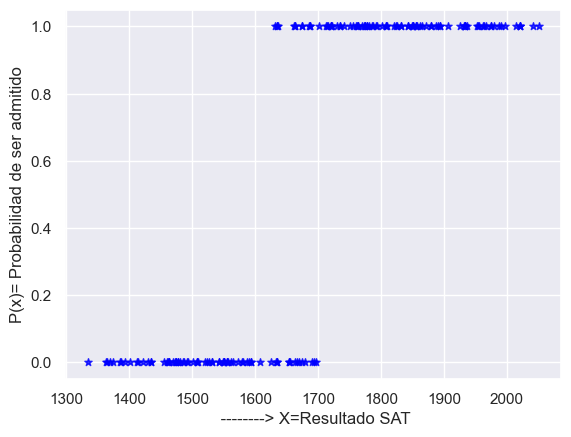

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of x1 (SAT, no constant) and y (Admitted)
#1) comando mas basico para plotear data con scatter plot 
plt.scatter(x,y, color="blue", s=30, marker="*", alpha=0.8)
plt.xlabel(" --------> X=Resultado SAT")
plt.ylabel("P(x)= Probabilidad de ser admitido")
plt.show()


# Don't forget to label your axes!


### Plot with a regression line

In [75]:
#Plotear una ecuacion lineal para ver como se ve el underfitting del resultado
x1=sm.add_constant(x)
#Agrega una columna de constante para indicar que mi regresion lineal no pasa por cero
x1.head()
#Procedo a definir un modelo basado en Ordinary Least Squares minimos cuadrados ordinarios. Metodo estadistico para regrecion lineal 


,const,SAT
0,1.0,1363
1,1.0,1792
2,1.0,1954
3,1.0,1653
4,1.0,1593


In [84]:
reg_model=sm.OLS(y,x1)
res_lin=reg_model.fit()
res_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Sun, 05 Oct 2025   Prob (F-statistic):           2.98e-43
Time:                        17:31:55   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
res_lin.params

const   -3.251859
SAT      0.002248
dtype: float64

C:\Users\CHOPPE\AppData\Local\Temp\ipykernel_26752\2703264432.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat=x1*res_lin.params[1]+res_lin.params[0]


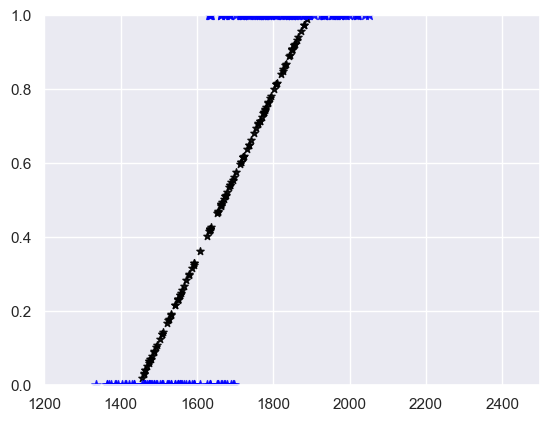

In [98]:
# Create a linear regression on the data in order to estimate the coefficients and be able to plot a regression line
# The data is not linear, so the linear regression doesn't make much sense
y_hat=x1*res_lin.params[1]+res_lin.params[0]
# I'll call it reg_lin, instead of reg, as we will be dealing with logistic regressions later on

# I'll segment it into regression and fitted regression (results) as I can use the results as an object for some operations
plt.scatter(x1, y_hat, s=30, color="black", marker="*", alpha=0.9)
plt.scatter(x,y, color="blue", s=50, marker="*", alpha=0.8)
plt.xlim(1200, 2500)
plt.ylim(0,1)
plt.show()

# Create a scatter plot

# Plot the regression line. The coefficients are coming from results_lin.params


### Plot a logistic regression curve

In [103]:
prueba_array=np.log(x)
prueba_array

0      7.217443
1      7.491088
2      7.577634
3      7.410347
4      7.373374
         ...   
163    7.451242
164    7.467371
165    7.349231
166    7.329094
167    7.286876
Name: SAT, Length: 168, dtype: float64

In [111]:
#De primero defino el tipo de modelo estadistico que quiero definir para posteriormente optimizar
reg_log=sm.Logit(y,x1)
reg_res_log=reg_log.fit()
reg_res_log.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sun, 05 Oct 2025   Pseudo R-squ.:                  0.7992
Time:                        18:43:36   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
#Por medio de params[] puedo acceder a las variables generadas en la optimizcion del modelo reg_log.fit()
b0=reg_res_log.params[0]
b1=reg_res_log.params[1]
print(f"la constante de intercepcion es igual a {b0} y la pendiente b1 es igual {b1}")

la constante de intercepcion es igual a -69.91280217619673 y la pendiente b1 es igual 0.042004866693767365


C:\Users\CHOPPE\AppData\Local\Temp\ipykernel_26752\1920968449.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0=reg_res_log.params[0]
C:\Users\CHOPPE\AppData\Local\Temp\ipykernel_26752\1920968449.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1=reg_res_log.params[1]


In [116]:
##Creo una función que me permite inyectar un panda series con las constantes y calcular el resultado de probabilidad siguiendo la ecuacion de mi modelo optimizado
def res_reg_log (x,bo,b1):
    return np.exp(bo+b1*x)/(1+np.exp(b0+b1*x))

In [ ]:
#Calculo y llamo a la funcion creada para crear mi array de resultados inputando X (valor SAT) y los coeficientes obtenidos b0, b1
resultados=res_reg_log (x,b0,b1)

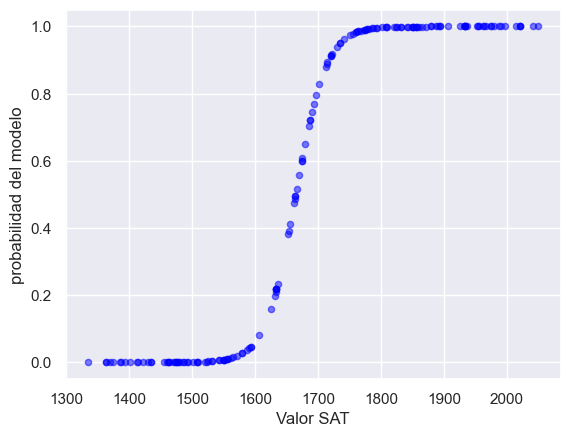

In [133]:
#Procedo a plotear mi data para ver el resultado antes de esto por recomendacion es importante ordenar los valores
x_sorted=np.sort(x)
resultados_sorted=np.sort(resultados)
#Procedo con el ploteo de data 
plt.scatter(x_sorted,resultados_sorted, s=20, color="blue", marker="o", alpha=0.5)
plt.xlabel("Valor SAT")
plt.ylabel("probabilidad del modelo")
plt.show()

In [132]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

Optimization terminated successfully.
         Current function value: 0.671734
         Iterations 3


C:\Users\CHOPPE\AppData\Local\Temp\ipykernel_26752\1901913320.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
# Creating a logit regression (we will discuss this in another notebook)

# Fitting the regression


# Creating a logit function, depending on the input and coefficients


# Sorting the y and x, so we can plot the curve


# Plotting the curve
